### What is the relationship between course price and the number of subscribers? Do higher-priced courses tend to have fewer subscribers?

### How does the number of reviews correlate with the number of subscribers? Is there a positive relationship between the two variables?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('udemy_courses.csv')
df = df.drop(['course_id', 'url', 'published_timestamp'], axis=1)
df.head(5)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance


To analyze the relationship between course price and the number of subscribers and determine if higher-priced courses tend to have fewer subscribers, we are calculating the correlation coefficient.

In [4]:
course_price, course_subscribers = df['price'], df['num_subscribers']
corr_coef = course_price.corr(course_subscribers)
print("Correlation coefficient between price and num_subscribers: ", corr_coef)

Correlation coefficient between price and num_subscribers:  0.05076934882586656


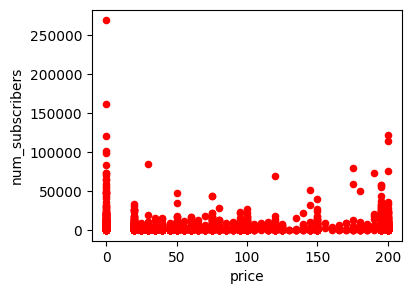

In [5]:
# scatter plot with course price on the x-axis and the number of subscribers on the y-axis. 
# Each data point represents a course. 
# The visualization allows us to visually inspect the data and observe any patterns or trends between the variables. 
fig, ax = plt.subplots(figsize=(4, 3))
df.plot.scatter(x='price', y='num_subscribers', c='red', ax=ax)
plt.show()

In [7]:
# ANOVA test
# Null hypothesis: there is no difference in the number of subscribers across the price ranges.
# Alternative hypothesis: there is a significant difference in the number of subscribers based on the course price.
# Defining price ranges
range1 = df[df['price'] < 50]['num_subscribers']
range2 = df[(df['price'] >= 50) & (df['price'] < 100)]['num_subscribers']
range3 = df[(df['price'] >= 100) & (df['price'] < 150)]['num_subscribers']
range4 = df[df['price'] >= 150]['num_subscribers']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(range1, range2, range3, range4)

# Print the results
print("F-value:", fvalue)
print("P-value:", pvalue)

F-value: 15.466214015346285
P-value: 5.362641132165275e-10


A p-value of 5.362641132165275e-10 (approximately 5.36e-10) indicates an extremely small value. 

When comparing this p-value to a significance level α, such as 0.05, we can conclude that the obtained result is statistically significant. In other words, there is a strong evidence to suggest that there is a significant difference in the number of subscribers across the different price ranges.

With such a small p-value, we can reject the null hypothesis, which assumes that there is no difference in the number of subscribers across the price ranges. Instead, we accept the alternative hypothesis, indicating that there is a statistically significant difference in the number of subscribers based on the course price.

In summary, based on the provided p-value, we can conclude that there is a significant association between course price ranges and the number of subscribers.

But when we created a scatter plot between the price and the number of subscribers we couldn't observe any clear trend or relationship. This is contradictory to the significant p-value obtained from the ANOVA test. One reason could be that the number of subscribers might be influenced by other factors or variables that are not accounted for in the analysis. It's possible that other factors, such as course reviews or content_duration, are more influential in driving the number of subscribers than the price itself. This could explain the lack of a clear relationship between price and the number of subscribers in the scatter plot. 

To verify this lets check the correlation coefficient between other factors.


In [9]:
corr_df = df.drop(['course_title', 'is_paid', 'level', 'subject'], axis=1)
corr_df.corr()

,price,num_subscribers,num_reviews,num_lectures,content_duration
price,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.293450,0.161839,0.228889,0.801647,1.000000


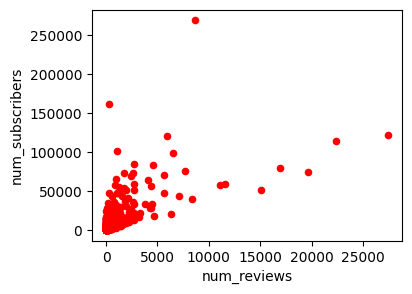

In [8]:
fig, ax = plt.subplots(figsize=(4, 3))
df.plot.scatter(x='num_reviews', y='num_subscribers', c='red', ax=ax)
plt.show()

A correlation coefficient of 0.649946 indicates a moderate positive correlation between the number of reviews and the number of subscribers. The scatter plot also shows a positive relationship, it further supports the conclusion of a positive association between these two variables.

Based on these findings, we can conclude that there is a moderate positive relationship between the number of reviews and the number of subscribers in the Udemy dataset we analyzed. This means that as the number of reviews increases, the number of subscribers tends to increase as well. In conclusion, the analysis suggests that a higher number of reviews is associated with a larger number of subscribers, indicating the potential influence of positive reviews on course popularity and learner engagement.

In conclusion, if there is no significant relationship between course price and the number of subscribers, it implies that the accessibility and affordability of online courses may not be solely determined by price. Other factors such as course quality, and course reviews may have a stronger influence on the number of subscribers.

While price can be an important factor in determining the affordability of online courses, it's essential to recognize that accessibility and affordability are multifaceted. Learners consider various aspects when deciding to enroll in a course, including their perceived value, the reputation of the course or platform, and the relevance of the course content to their learning goals.